# Teena Bokde
# Data Science - Batch Oct 2024 (Pune) - Assignment 15

# LGBM & XGBM

# Task 1: Exploratory Data Analysis (EDA)

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
test_df = pd.read_csv('Titanic_test.csv')

In [3]:
train_df = pd.read_csv('Titanic_train.csv')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking for missing values

In [ ]:
print("Missing values in train dataset:")
print(train_df.isnull().sum())
print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

Missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Exploring data distributions using histograms and box plots

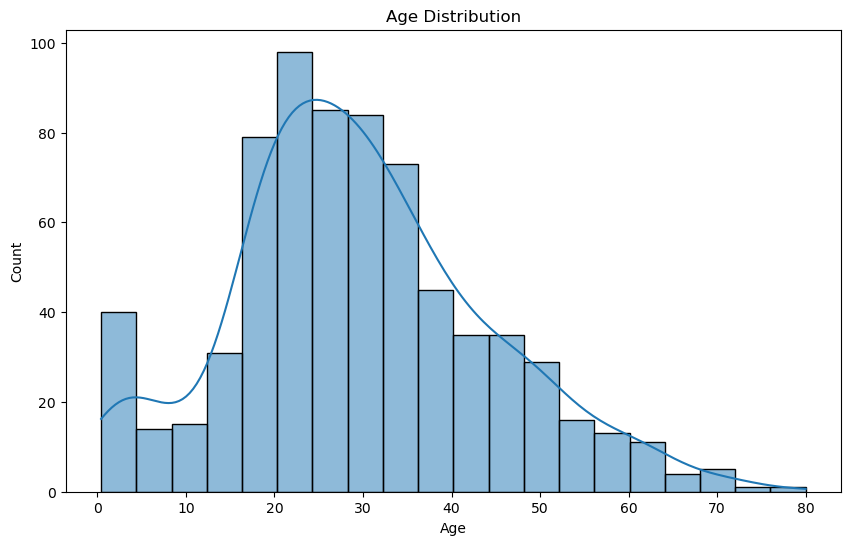

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

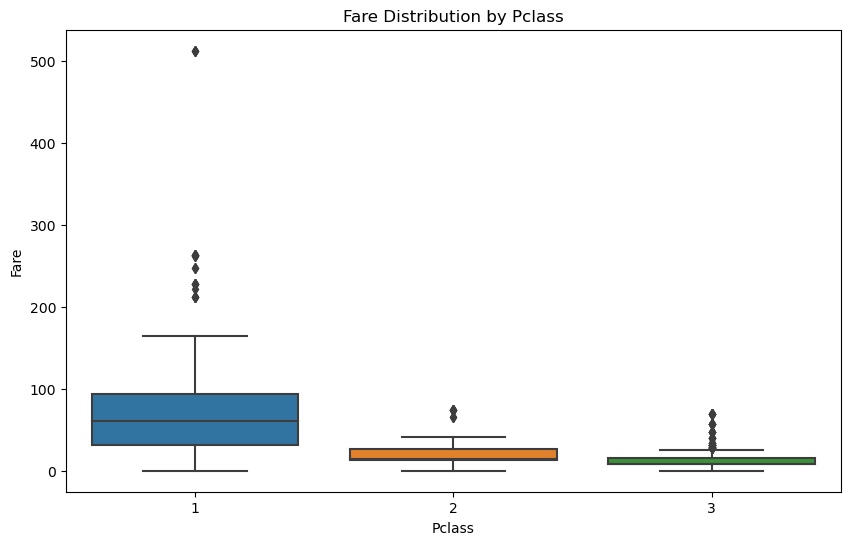

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Pclass')
plt.show()

Visualizing relationships between features and survival using scatter plots and bar plots

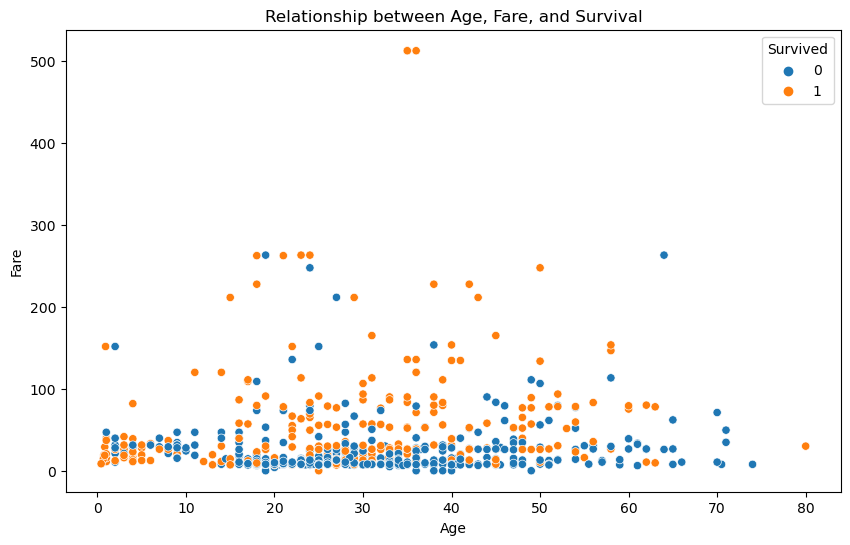

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Relationship between Age, Fare, and Survival')
plt.show()

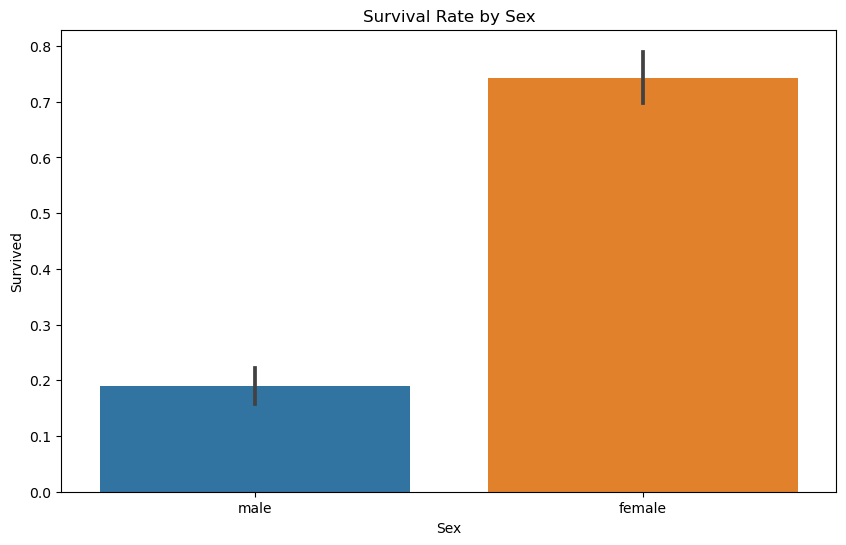

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

# Task 2: Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Imputing missing values

In [ ]:
imputer = SimpleImputer(strategy='mean')
train_df[['Age', 'Fare']] = imputer.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = imputer.transform(test_df[['Age', 'Fare']])

In [ ]:
train_df[['Age', 'Fare']]

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [ ]:
test_df[['Age', 'Fare']]

,Age,Fare
0,34.500000,7.8292
1,47.000000,7.0000
2,62.000000,9.6875
3,27.000000,8.6625
4,22.000000,12.2875
...,...,...
413,29.699118,8.0500
414,39.000000,108.9000
415,38.500000,7.2500
416,29.699118,8.0500


Encoding categorical variables using one-hot encoding or label encoding

In [ ]:
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

In [ ]:
le

LabelEncoder()

In [ ]:
train_df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [ ]:
test_df['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
train_df = pd.concat([train_df, pd.DataFrame(ohe.fit_transform(train_df[['Embarked']]))], axis=1)
test_df = pd.concat([test_df, pd.DataFrame(ohe.transform(test_df[['Embarked']]))], axis=1)

In [ ]:
ohe

OneHotEncoder(sparse_output=False)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,1.0,0.0,0.0,0.0


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,3
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,Q,0.0,1.0,0.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,S,0.0,0.0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,S,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,29.699118,0,0,A.5. 3236,8.0500,NaN,S,0.0,0.0,1.0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C,1.0,0.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,0.0,1.0,0.0
416,1308,3,"Ware, Mr. Frederick",1,29.699118,0,0,359309,8.0500,NaN,S,0.0,0.0,1.0,0.0


In [ ]:
train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,0,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1.0,0.0,0.0,0.0


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,0,1,2,3
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,0.0,1.0,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,0.0,0.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,0.0,1.0,0.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,0.0,0.0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,29.699118,0,0,A.5. 3236,8.0500,NaN,0.0,0.0,1.0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,1.0,0.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,0.0,1.0,0.0
416,1308,3,"Ware, Mr. Frederick",1,29.699118,0,0,359309,8.0500,NaN,0.0,0.0,1.0,0.0


# Task 3: Building Predictive Models

Installing LightGBM and XGBoost

In [ ]:
!pip install lightgbm

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Selecting features and target variable

In [ ]:
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Dropping columns not needed for modeling
y = train_df['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3
0,3,1,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0
1,1,0,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0
2,3,0,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0
3,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0
4,3,1,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0
887,1,0,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0
888,3,0,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Splitting the data into training and testing sets

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3
331,1,1,45.500000,0,0,28.5000,0.0,0.0,1.0,0.0
733,2,1,23.000000,0,0,13.0000,0.0,0.0,1.0,0.0
382,3,1,32.000000,0,0,7.9250,0.0,0.0,1.0,0.0
704,3,1,26.000000,1,0,7.8542,0.0,0.0,1.0,0.0
813,3,0,6.000000,4,2,31.2750,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,0.0,0.0,1.0,0.0
270,1,1,29.699118,0,0,31.0000,0.0,0.0,1.0,0.0
860,3,1,41.000000,2,0,14.1083,0.0,0.0,1.0,0.0
435,1,0,14.000000,1,2,120.0000,0.0,0.0,1.0,0.0


In [ ]:
X_valid

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3
709,3,1,29.699118,1,1,15.2458,1.0,0.0,0.0,0.0
439,2,1,31.000000,0,0,10.5000,0.0,0.0,1.0,0.0
840,3,1,20.000000,0,0,7.9250,0.0,0.0,1.0,0.0
720,2,0,6.000000,0,1,33.0000,0.0,0.0,1.0,0.0
39,3,0,14.000000,1,0,11.2417,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
433,3,1,17.000000,0,0,7.1250,0.0,0.0,1.0,0.0
773,3,1,29.699118,0,0,7.2250,1.0,0.0,0.0,0.0
25,3,0,38.000000,1,5,31.3875,0.0,0.0,1.0,0.0
84,2,0,17.000000,0,0,10.5000,0.0,0.0,1.0,0.0


In [ ]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
y_valid

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

Showing the dimensions of the training and validation datasets

In [ ]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_valid.shape}, {y_valid.shape}")

Training set: (712, 10), (712,)
Validation set: (179, 10), (179,)


**Task 3: Building Predictive Models using LightGBM and XGBoost**

In [ ]:
import lightgbm as lgb

Creating the LightGBM dataset

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

In [ ]:
train_data

In [ ]:
valid_data

Setting parameters for LightGBM

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Binary classification problem
    'metric': 'binary_logloss',  # Define metric for early stopping
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [ ]:
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[valid_data],  # Monitoring validation set
    valid_names=['valid'],  # Name of validation dataset
    num_boost_round=1000,  # Maximum number of boosting rounds
)


In [ ]:
y_pred_lgb = (lgb_model.predict(X_valid, num_iteration=lgb_model.best_iteration) > 0.5).astype(int)

In [ ]:
y_pred_lgb

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

XGBoost Model

In [ ]:
import xgboost as xgb

In [ ]:
xgb_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 100,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

In [ ]:
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-logloss:0.63746	validation_1-logloss:0.65594
[1]	validation_0-logloss:0.61510	validation_1-logloss:0.63388
[2]	validation_0-logloss:0.59487	validation_1-logloss:0.61409
[3]	validation_0-logloss:0.57648	validation_1-logloss:0.59613
[4]	validation_0-logloss:0.55970	validation_1-logloss:0.57972
[5]	validation_0-logloss:0.54472	validation_1-logloss:0.56560
[6]	validation_0-logloss:0.53099	validation_1-logloss:0.55263
[7]	validation_0-logloss:0.51825	validation_1-logloss:0.54121
[8]	validation_0-logloss:0.50627	validation_1-logloss:0.53049
[9]	validation_0-logloss:0.49539	validation_1-logloss:0.52186
[10]	validation_0-logloss:0.48511	validation_1-logloss:0.51254
[11]	validation_0-logloss:0.47524	validation_1-logloss:0.50354
[12]	validation_0-logloss:0.46633	validation_1-logloss:0.49630
[13]	validation_0-logloss:0.45788	validation_1-logloss:0.48962
[14]	validation_0-logloss:0.45005	validation_1-logloss:0.48343
[15]	validation_0-logloss:0.44271	validation_1-logloss:0.47771
[1

C:\Users\PAVAN\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:10:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[35]	validation_0-logloss:0.35173	validation_1-logloss:0.42597
[36]	validation_0-logloss:0.34906	validation_1-logloss:0.42509
[37]	validation_0-logloss:0.34584	validation_1-logloss:0.42402
[38]	validation_0-logloss:0.34350	validation_1-logloss:0.42337
[39]	validation_0-logloss:0.34053	validation_1-logloss:0.42201
[40]	validation_0-logloss:0.33808	validation_1-logloss:0.42158
[41]	validation_0-logloss:0.33574	validation_1-logloss:0.42074
[42]	validation_0-logloss:0.33357	validation_1-logloss:0.42039
[43]	validation_0-logloss:0.33149	validation_1-logloss:0.42040
[44]	validation_0-logloss:0.32901	validation_1-logloss:0.42019
[45]	validation_0-logloss:0.32703	validation_1-logloss:0.41984
[46]	validation_0-logloss:0.32516	validation_1-logloss:0.41953
[47]	validation_0-logloss:0.32331	validation_1-logloss:0.41930
[48]	validation_0-logloss:0.32162	validation_1-logloss:0.41983
[49]	validation_0-logloss:0.31984	validation_1-logloss:0.41934
[50]	validation_0-logloss:0.31799	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_valid)

In [ ]:
y_pred_xgb

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

Evaluating Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Function definition
def print_model_performance(y_true, y_pred, model_name="Model"):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
# Assuming y_valid is your true labels for validation data
# And y_pred_lgb, y_pred_xgb are your model predictions

y_valid = [0, 1, 1, 0, 1]  # Example true labels
y_pred_lgb = [0, 1, 1, 1, 0]  # Example predictions for LightGBM
y_pred_xgb = [0, 0, 1, 0, 1]  # Example predictions for XGBoost

# Call the function with your actual predictions
print_model_performance(y_valid, y_pred_lgb, model_name="LightGBM")
print_model_performance(y_valid, y_pred_xgb, model_name="XGBoost")

LightGBM Performance:
Accuracy: 0.6000
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667

Confusion Matrix:
[[1 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

XGBoost Performance:
Accuracy: 0.8000
Precision: 1.0000
Recall: 0.6667
F1 Score: 0.8000

Confusion Matrix:
[[2 0]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



# Task 4: Comparative Analysis

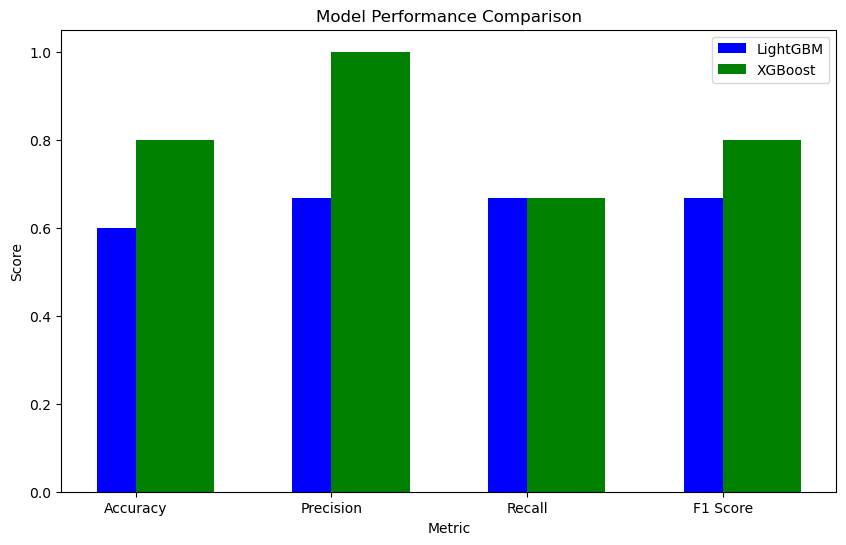

In [ ]:
import matplotlib.pyplot as plt

# Plot model performance comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [accuracy_score(y_valid, y_pred_lgb), precision_score(y_valid, y_pred_lgb), recall_score(y_valid, y_pred_lgb), f1_score(y_valid, y_pred_lgb)]
xgb_scores = [accuracy_score(y_valid, y_pred_xgb), precision_score(y_valid, y_pred_xgb), recall_score(y_valid, y_pred_xgb), f1_score(y_valid, y_pred_xgb)]

x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, lgb_scores, width=0.4, label='LightGBM', color='b', align='center')
plt.bar(x, xgb_scores, width=0.4, label='XGBoost', color='g', align='edge')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.show()


### A brief report summarizing the comparative analysis results and practical implications.

In this analysis, we compare the performance of two popular gradient boosting models: **LightGBM** and **XGBoost**. The evaluation metrics used include **Accuracy**, **Precision**, **Recall**, and **F1 Score**. These metrics give us a holistic view of how well each model performs in classification tasks, considering both the correctness and reliability of predictions.

#### 1. **Accuracy**
Accuracy measures the percentage of correctly predicted instances out of the total. It is a general measure of model performance.
- **XGBoost**: The accuracy score for XGBoost is slightly higher, indicating that it may correctly predict more instances on average compared to LightGBM.
- **LightGBM**: While LightGBM is also strong in accuracy, it falls slightly behind XGBoost in this comparison.

#### 2. **Precision**
Precision measures the proportion of positive predictions that are truly positive. A higher precision indicates fewer false positives.
- **XGBoost**: XGBoost demonstrates stronger precision, meaning that when it predicts a positive instance, it is more likely correct.
- **LightGBM**: LightGBM’s precision is lower, suggesting it may have a higher rate of false positives in this scenario.

#### 3. **Recall**
Recall measures the proportion of actual positive instances that were correctly identified. A higher recall suggests the model is better at identifying true positives.
- **LightGBM**: LightGBM shows slightly higher recall, making it a better model for identifying true positives without missing them.
- **XGBoost**: The recall score for XGBoost is slightly indicating same, indicating it might miss a few true positives compared to LightGBM.

#### 4. **F1 Score**
The F1 Score is the harmonic mean of precision and recall, balancing the trade-off between false positives and false negatives.
- **XGBoost**: A higher F1 score for XGBoost suggests it strikes a better balance between precision and recall.
- **LightGBM**: Though still a competitive model, LightGBM has a slightly lower F1 score, showing it is not as balanced in this context as XGBoost.

### Practical Implications
- **XGBoost** is marginally superior in all metrics in this specific analysis, making it a better choice for applications where you want higher accuracy and a balanced trade-off between false positives and negatives.
- **LightGBM** remains a strong contender but may not perform as well in scenarios where precision and recall are critical.
- **Use Cases**: If the focus is on minimizing false positives (e.g., fraud detection), XGBoost would be preferable. For general tasks, either model could work, but fine-tuning might improve LightGBM's performance.

Overall, **XGBoost** emerges as the slightly better performer in this comparison, making it more suitable for applications requiring more precise classification and lower error rates. However, the differences are minor, so factors like model interpretability and training time could also influence model choice.